## Pulling data from an Analysis

### This tutorial shows how data from an OLAP table in Celonis can be extracted. The data can then be used in Python. 

To do this, only 4 steps are necessary: <br>
1. Connect to Celonis <br>
2. Connect to an analysis in Celonis that contains the OLAP table <br>
3. Find the OLAP table <br>
4. Extract the OLAP table <br>

Note: You can also extract data from any component in the analysis in a similar way.


### Connect to Celonis

In [1]:
from pycelonis import get_celonis

celonis = get_celonis()

2019-12-04 08:23:17 - pycelonis: Login successful! Hello Simon Riezebos


### Find the analysis by either searching for the analysis's name or ID

In [2]:
analysis = celonis.analyses.find('Analysis id/name')
analysis

<Analysis, id 440cb0ba-7f00-4ec9-a50a-f9f8772e5893, name Test PyCelonis>

### Find the table that you want to extract through the table's name.

In [3]:
component = analysis.draft.components.find("Vendors")
component

2019-12-04 08:23:24 - pycelonis: Best matches: [(0.9, '#{Vendors}'), (0.4, 'No. of vendors'), (0.0, '')]


<BaseAnalysisComponent, id 6bce2ff5-ee25-4d59-8387-81c387a8fc30, name #{Vendors}>

### Extract the OLAP table with the the get_data_frame() function.

In [4]:
df = component.get_data_frame()
df.head()

,LFA1.LIFNR,LFA1.LAND1
0,SORAYA45,ES
1,SP-CARA,IT
2,SP-CARB,IT
3,SRV-2,DE
4,SS_FLEET1,US


### Add a PQL column to that table

In this section, we add a column to the PQL query and extract the table again with the new column. For this, we need to import pycelonis.pql
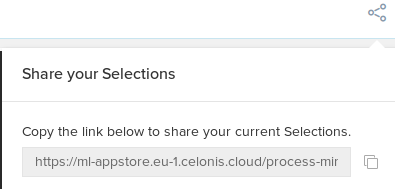

Create a PQL column object. 

Here we want, additionally to the vendor's number and country, the city of the vendor. The city can be found in the column ORT01 of the LFA1 table. It is very important here that we use the exact same syntax ("LFA1"."ORT01") as we would use it in Celonis. Common errors that could happen here are:
* Missing double quotes e.g. LFA1"."ORT01"
* Spelling mistakes of the table's name e.g. "LFA"."ORT01"
* Spelling mistakes in the table's column e.g. "LFA1"."ORT0"

The errors will occur first when we pull the data. In case you get an error message there, first check the spelling of your PQL query
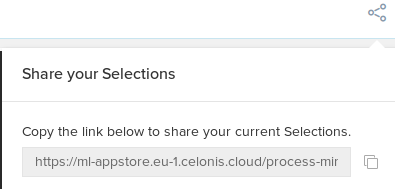

In [1]:
from pycelonis.pql import PQLColumn
query = component.pql_query
column = PQLColumn(query = '"LFA1"."ORT01"', name= "City", sorting_index = 3, sorting_direction = 'DESC')

Now we add the column to the query original component pql query

In [9]:
query.add(column)

The column is added to the PQL query and we can extract the table now with the additional column "LFA1"."ORT01"

In [10]:
df = analysis.get_data_frame(query)
df.head()

,LFA1.LIFNR,LFA1.LAND1,City
0,0000000030,ES,santander
1,0000000290,ES,santander
2,RFDC,US,refcity
3,0000009907,DE,rankfurt
4,0000005001,JP,osaka


### Advanced: Add filters and variables from "Share your selections"
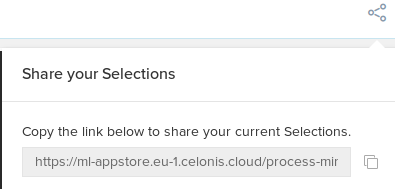

### Make a selection and/or change variables and copy the url into the cell below

In [6]:
url = "https://ml-appstore.eu-1.celonis.cloud/process-mining/analysis/440cb0ba-7f00-4ec9-a50a-f9f8772e5893/link/frontend/documents/440cb0ba-7f00-4ec9-a50a-f9f8772e5893/view/sheets/5066b16f-f342-4be4-a70c-b744684e5ac3/b/0dd91c45-73c2-4312-93c5-d7602bcc640b"
selection = analysis.process_shared_selection_url(url)

### Add the selection query to the component query and pull the data from the analysis

In [7]:
query = component.pql_query
query += selection
analysis.get_data_frame(query)

,LFA1.LIFNR,LFA1.LAND1
0,SORAYA45,ES
1,SP-CARA,IT
2,SP-CARB,IT
